In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import torch
import re
import numpy as np

In [ ]:
import os
os.chdir("/content/drive/MyDrive")
!ls

 AI-molecular.gslides
 AI-proposal.gdoc
 Assignment_4
 bert-base-cased_final_results.csv
 chehreh.jpg
'Colab Notebooks'
 data.csv
 distilroberta-base_final_results.csv
'GAN _LSGAN.ipynb'
 HW3.gdoc
'Image Captioning Using Encoder-Decoder Architecture.ipynb'
 Interview.gdoc
 kaggle.json
 KARTMELI.jpg
 MIMICaccess.gdoc
 nesha
 NLPudemy
'out1 (1).xls'
 out1_sareh.csv
 P1830603-1.jpg
 pic080.jpg
 pic081.jpg
 professions.json
 Report.docx
 roberta-base_final_results.csv
 roberta-large_final_results.csv
 Robotics1.rar
 scan005.jpg
 shenasname.jpg
 SKMBT_C35113090707481_0001.jpg
 sop1.docx
 sop-changes.gdoc
 sss111_0003.jpg
 STAT.rar
'To-do list.gsheet'
'Unified, Real-Time Object Detection (YOLO).ipynb'
 untitled4.py
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document (3).gdoc'
'Untitled document.gdoc'
'Untitled presentation (1).gslides'
'Untitled presentation.gslides'


In [ ]:
df = pd.read_csv('out1_sareh.csv')
df

,paragraph_index,paragraph,sentence,label
0,0,"['1)', '2) EGD this am, continue octreotide g...","No tremors, no H/A, Alert and oriented, plea...",[1]
1,1,"['1)', '2) altered mental status, anticholine...","In the ED, he was reportedly combative, irri...",[2]
2,2,['1) Flolan at 15ng/kg/min (based on 95kg mai...,Anxiety Assessment:,[1]
3,3,"['1) Events:', '2) Moderate amount of bleedi...",Fentanyl w/ facial grimacing with trach car...,[1]
4,4,"['1) Assessed mental status.', '2) Reoriente...",No change in mental status.,[1]
...,...,...,...,...
553,546,"['1)', '2) BS being monitored, regular insuli...",*] Left leg pain with grimacing and yelling ...,[1]
554,547,"['1)', '2) th 100 mcg boluses every [', '3) ...","Subsequently, on Saturday afternoon [**10-6*...",[1]
555,548,"[""1) PRBC's with a repeat"", '2) Hct-33.6 (28...",pt had a profound episode of agitation requ...,[1]
556,549,"['1)', '2) s/', '3) p L: hip repair.', '4) ...","Pt intermittently confused,attempting to get...",[1]


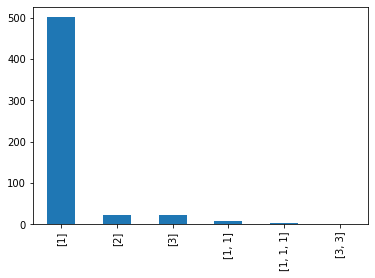

In [ ]:
#check the distribution of sentiment classes across our data.

df['label'].value_counts().plot(kind='bar')

In [ ]:
text = df['paragraph'][0]
text

"['1)', '2)  EGD this am, continue octreotide gtt, transfuse prn, possible transfer  out to medical floor if remains stable.', '3)  Check serial Hcts  Pain control (acute pain, chronic pain  Assessment:', '4)  c/', '5)  o', '6)  [', '7)  **8-30', '8)  **] abd pain and states', '9)  it is', '10)  the same pain he gets when his  pancreatitis gets worse, tender to palpation', '11)  , positive bowel sounds', '12)  all quads, NPO, states that dilaudid helps him with pain control', '13)  Action:', '14)  Dilaudid 1 mg x 1 with relief  Response:  Good pain control with dilaudid  Plan:', '15)  Assess comfort level and level of abd pain Q2-3hrs, medicate with  dilaudid Q4hr for pain.', '16)  .H', '17)  /', '18)  O alcohol withdrawal (including delirium tremens, DTs, seizures', '19)  Assessment:', '20)  No tremors, no H/A, Alert and oriented, pleasant and cooperative,  following all commands, denies anxiety, denies hallucinations, no  sweating noted, lethargic following dilaudid dose, CIWA,<10  A

In [ ]:
from sklearn.model_selection import train_test_split

x = df.paragraph.values
y = df.label.values

X_train , X_val , y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=2020) 

In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
print(type(y_train))

<class 'numpy.ndarray'>


In [ ]:
def text_preprocessing(text):
  modified_string = re.sub(r"[0-9]\)", "", text)
  m = re.sub(r'[\([{})\]]', "", modified_string)
  m2 = re.sub("'", "", m)
  #remove extra spaces
  m3 = re.sub(' +', ' ', m2)
  #remove the colons
  m4 = re.sub(',', "", m3)
  return m4



In [ ]:
X_train_preprocessed = np.array([text_preprocessing(text) for text in X_train ])
X_val_preprocessed= np.array([text_preprocessing(text) for text in X_val ])

In [ ]:
def label_preprocessing(labels):
  sentiment = []
  for label in labels:
    label = label.replace( "[" , "")
    label = label.replace("]" , "")
    label = label.replace(",", " ")
    sentiment.append(label)
  s = [s[:2] for s in sentiment] 
  sentiments = [int(i) for i in s]
  return sentiments



In [ ]:
y_train_preprocessed = np.array(label_preprocessing(y_train) )
y_val_preprocessed = np.array(label_preprocessing(y_val) )


In [ ]:
# Print sentence 0
print('Original: ', X_train[0])
print('Processed: ', text_preprocessing(X_train[0]))

Original:  ['1)  Nsg.progress notes:See flow sheet for specific:Neuro:', '2)  Pt is alert and oriented', '3)  x', '4)  [*', '5)  *1-18', '6)  **], confused inbetween,but easily reoriented back, c/o pain, dilaudid prn with good effcet, ativan 1mg as pt c/', '7)  o insomnia with fair effect,', '8)  pleasant and co op with care.']
Processed:   Nsg.progress notes:See flow sheet for specific:Neuro: Pt is alert and oriented x * *1-18 ** confused inbetweenbut easily reoriented back c/o pain dilaudid prn with good effcet ativan 1mg as pt c/ o insomnia with fair effect pleasant and co op with care.


In [ ]:
data = pd.DataFrame({'text':X_train_preprocessed, 'label':y_train_preprocessed})
data

,text,label
0,Nsg.progress notes:See flow sheet for specifi...,2
1,oriented to place and time but moving around ...,1
2,Pt is alert and oriented X 1. Pleasently conf...,1
3,Cont calm approach. Cont security sitters. Po...,1
4,* *Hospital3 7950 * * and also at * *Hospita...,1
...,...,...
497,516 ** pt mechanically ventilated 40%/550/18/...,1
498,may be coughing r/t sob with exertion. speech...,1
499,O2 4l nc sats=96-98%. Coughing up beige sputu...,1
500,HR 50-60 SB on IV esmolol at 100mcg/kg/min BP...,1


In [ ]:
data.to_csv('finalData.csv', index=False)

In [ ]:
data_val = pd.DataFrame({'text': X_val_preprocessed, 'label':y_val_preprocessed})
data_val

,text,label
0,RN shift note neuro: Intact; AAO x 3. Coop & ...,1
1,Response: She * *Doctor Last Name * * w/ low...,1
2,Able to communicate via daughter. Daughter st...,1
3,ema/anasarca 6 plus pitting bilateral pleural...,1
4,Con Q6hr Acetminophen emotional support PRN M...,1
5,Still has + air-leak. Plan: Pulmonary toilet ...,1
6,th 100 mcg boluses every **1-16 * * hrs. Als...,1
7,* Last Name STitle * * aware pt weaned off la...,1
8,SBT and PSV. * *Month only 11 ** need presid...,1
9,3000 ** * * Last Name Titles * * consult tomo...,1


In [ ]:
data_val.text[50]

' *Month/Year 2 1918 * * c low residuals noted. Pt cont to be incontinent ofloose brown stools that are guaic negative. Abd is soft c + BS appreciated. MS: Pt appears relatively comfortable lying in bed when left alone but becomes distressed when direct pt care is provided. 1 Pt does respond to verbal stimuli and follows simple commands. 1 Pt mouthed the word "no" when asked if she was in pain this AM. 1 Pt mouthed the word " 1 yes" when asked if she was itchy subsequently 25mg PO Benadryl was provided via * 1 *Month/Year 2 1 1918 1 * 1 *. 1 Pt re-oriented to person/place/time/care rationale to assist c nl cognition. 1 SOC: 2 Son '

In [ ]:
data_val.to_csv('finalData_val.csv', index=False)

In [ ]:
#from typing import Pattern
modified_string = re.sub(r"[0-9]\)", "", text)
modified_string
m = re.sub(r'[\([{})\]]', "", modified_string)
m2 = re.sub("'", "", m)
#remove extra spaces
m3 = re.sub(' +', ' ', m2)
#remove the colons
m4 = re.sub(',', "", m3)
m4
#text = re.sub(pattern, '' , text)

' Flolan at 15ng/kg/min based on 95kg maintained at 17.2cc /hr O2 4l nasal prongs. Response: O2 saturation >94%. No c/o SOB at rest. Plan: Continue to follow Flolan guidelines observe for change in respiratory status with activity. Systemic Lupus Erythematosus SLE Assessment: 1 c/ 1 o generalized aches and pains in joints Action: 1 Receives home doses of Tylenol 1 #3- 2 tabs at 4-6am noon and bedtime. 1 Hydrocodone 7.5mg-325 1 mg 2 tabs mid am and 4-6pm. 1 Response: 1 Fair control of pain Plan: 1 Continue home regime for pain control. 1 Possibly have pain service consulted for fentanyl patch. 2 Anxiety Assessment:'

In [ ]:
labels = df['label'].values
type((labels))
sentiment = []
for label in labels:
  label = label.replace( "[" , "")
  label = label.replace("]" , "")
  label = label.replace(",", "")
  sentiment.append(label)
s = [s[:2] for s in sentiment] 
sentiments = [int(i) for i in s]

In [ ]:
import numpy as np
#sentiments.count().plot(kind='bar')

In [ ]:
!pip install transformers

In [ ]:
#model_name = 'Emran/ClinicalBERT_ICD10_Full'
model_name = 'AndyJ/clinicalBERT'
model_name = 'Tsubasaz/clinical-pubmed-bert-base-512'

In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(model_name)


Some weights of the model checkpoint at Tsubasaz/clinical-pubmed-bert-base-512 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Tsubas

In [ ]:
from transformers import BertTokenizer

tokeniser = BertTokenizer.from_pretrained(model_name)

tokens = tokeniser(df['paragraph'].tolist(), max_length= 512, padding = 'max_length', truncation = True,
                      add_special_tokens = True, return_tensors = 'pt' )

In [ ]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
output = model(**tokens)

In [ ]:
output.shape

In [ ]:
text_IDs = tokens.input_ids
text_mask = tokens.attention_mask

In [ ]:
text_IDs

In [ ]:
sentiments= torch.tensor(sentiments).unsqueeze(dim=1)
sentiments.shape

In [ ]:
text_IDs.shape

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
dataset = TensorDataset(text_IDs, text_mask, sentiments)

In [ ]:
batch_size = 16
split = 0.9
size = text_IDs.shape[0]
train_size = int(size/batch_size * split)
val_size = len(dataset)-train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size , val_size])

In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle= True, drop_last= True)
val_loader = DataLoader(val_dataset, batch_size = 16, shuffle= True, drop_last= True)

In [ ]:
class Clinicalbert(torch.nn.Module):
  def __init__(self):

    super(Clinicalbert, self).__init__()
  #transformer
    self.hidden_states = BertForSequenceClassification.from_pretrained(model_name)
  #clasification heads
    self.layer1 = torch.nn.Linear(768, 3)
  #prob
    self.prob = torch.nn.Softmax(dim = 1)

  def forward(self, text_IDs, attention_mask):

    embeddings = self.hidden_states(text_IDs, attention_mask)[1] #get the pooled output
    print(embeddings.shape)
    z = self.layer1(embeddings[:0]) #get the cls vector
    output= self.prob(z)
    return output



In [ ]:
if torch.cuda.is_available():
  device  = torch.device("cuda")
else:
  device = torch.device("cpu")

In [ ]:
model= Clinicalbert()
model.to(device)

In [ ]:
criterian =torch.nn.CrossEntropyLoss()
optimiser = torch.optim.AdamW(params = model.parameters() , lr = 5e-3)

In [ ]:
def evaluate(model,dataloader, device):

    model.eval()
    total_loss = 0
    predictions, true_labels = [], []
    criterion = torch.nn.CrossEntropyLoss()

    for batch in dataloader:
        batch = tuple(b.to(device) for b in batch)

        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'token_type_ids':batch[2],
        }
        with torch.no_grad():
            outputs = model(**inputs)

        targets = batch[3].to(device, dtype=torch.long)
        loss = criterion(outputs, targets)
        total_loss += loss.item()
        logits = outputs.data
        logits = logits.detach().cpu().numpy()
        label_ids = batch[3].cpu().numpy()
        predictions.append(logits)
        true_labels.append(label_ids)

    loss_avg = total_loss / len(dataloader)
    predictions = np.concatenate(predictions, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)

    return loss_avg, predictions, true_labels

In [ ]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
from tqdm import tqdm

In [ ]:
epoch = 5
for i in range(5):
  model.train()
  for iterarion, data in tqdm(enumerate(train_loader, 0)):
    ids = data[0].to(device)
    attention = data[1].to(device)
    targets = data[2].to(device)
    out = model (ids, attention)
    loss = criterian(labels, out)
    if iterarion % 100 == 0:
        valid_loss, predictions_valid, true_valid = evaluate(model, val_loader, device)
        valid_f1 = f1_score_func(predictions_valid, true_valid)
        train_loss, predictions_train, true_train = evaluate(model, train_loader, device)
        train_f1 = f1_score_func(predictions_train, true_train)
        print("\nf1 score on valid data is: ", valid_f1)
        print("\nf1 score on train data is: ", train_f1)



    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  torch.save(model.state_dict(), f'ClinicalBert_epoch{i}.model')

In [ ]:
outputs = model (**tokens)

In [ ]:
outputs

In [ ]:
outputs.logits.shape


In [ ]:
#etract the logit tensor
outputs[0]

In [ ]:
import torch.nn.functional as F
probs = F.softmax(outputs[0], dim = -1)
probs

In [ ]:
import torch
pred = torch.argmax(probs)
pred.item()